In [119]:
from usda_mmn_utils import *
import openpyxl

In [120]:
markets_df = get_markets_list()
print(markets_df.head())
print(markets_df.tail())

  slug_id                  market_name
0    2277               Atlanta fruits
1    2278           Atlanta vegetables
2    2279  Atlanta onions and potatoes
3    2280                 Atlanta nuts
4    2281             Baltimore fruits
    slug_id                                        market_name
137    3706    Hamburg, Germany Terminal Nut Prices (HA_FV201)
138    3716                                Tokyo, Japan fruits
139    3717                            Tokyo, Japan vegetables
140    3718                   Tokyo, Japan onions and potatoes
141    3719  Tokyo, Japan Ornamental Terminal Prices (TK_FV...


In [121]:
commodities_list = get_commodities_list(slug_id = markets_df.iloc[0]['slug_id'])
print(commodities_list)


['Limes', 'Avocados', 'Grapes', 'Apples', 'Pineapples', 'Plantains', 'Lemons', 'Bananas', 'Cantaloupes', 'Grapefruit', 'Blueberries', 'Oranges', 'Papaya', 'Mangoes', 'Blackberries', 'Coconuts', 'Strawberries', 'Watermelons', 'Peaches', 'Pears', 'Kiwifruit', 'Carambola - Star Fruit', 'Raspberries', 'Honeydews', 'Dates', 'Guava']


In [122]:
prices_df = get_prices(commodity=commodities_list[0], slug_id=markets_df.iloc[0]['slug_id'], start_year=2020, end_year=2022)

In [123]:
print(prices_df.head())

         date  slug_id commodity        variety        package item_size  \
0  2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      175s   
1  2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      150s   
2  2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      230s   
3  2020-12-31     2277     Limes  SEEDLESS TYPE  40 lb cartons      200s   
4  2020-12-31     2277     Limes  SEEDLESS TYPE  10 lb cartons       54s   

   properties grade organic  origin  price  unit_sales  
0         NaN   NaN       N  Mexico  19.75         NaN  
1         NaN   NaN       N  Mexico  19.75         NaN  
2         NaN   NaN       N  Mexico  19.75         NaN  
3         NaN   NaN       N  Mexico  19.00         NaN  
4         NaN   NaN       N  Mexico   8.25         NaN  


In [124]:
from usda_mmn_utils import *
import openpyxl
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime

In [125]:

veg_market = "2278"
commodities_list = get_commodities_list(slug_id = veg_market)
#print(commodities_list)

In [126]:
commodity = "Tomatoes"
prices_df = get_prices(commodity=commodity, slug_id=veg_market, start_year=2015, end_year=2023)
prices_df['date'] = pd.to_datetime(prices_df['date'], format="%Y-%m-%d")

In [127]:
print("Varieties")
varieties = prices_df.variety.value_counts()
pprint(varieties)
print("--------------------------")
print("Packages")
packages = prices_df.package.value_counts()
pprint(packages)
print("--------------------------")
print("Item sizes")
item_sizes = prices_df.item_size.value_counts()
pprint(item_sizes)
print("--------------------------")
print("Origins")
origin = prices_df.origin.value_counts()
pprint(origin)

Varieties
variety
VINE RIPES                        24920
MATURE GREENS                      4550
IMMATURE GREENS                    1850
VINE RIPE - HEIRLOOM VARIETIES      463
Name: count, dtype: int64
--------------------------
Packages
package
25 lb cartons loose         14027
cartons 2 layer             11259
25 lb cartons place pack     4907
10 lb cartons                 516
5 kg/11 lb flats              414
flats 2 layer                 173
10 lb flats                   163
15 lb flats                   161
20 lb cartons loose            84
flats 1 layer                  78
11 lb flats                    49
Name: count, dtype: int64
--------------------------
Item sizes
item_size
large           4213
5x6s            4023
extra large     3531
6x6s            3380
5x6 size        2750
6x6 size        2401
4x5s            2155
5x5s            1930
jumbo           1842
4x4s            1729
6x7 size         836
6x7s             680
medium           574
4x5 size         461
5x5 size  

In [128]:
temp_df  =prices_df[['variety', 'package']].dropna()
vp_tuples = tuple(map(tuple, temp_df[['variety', 'package']].drop_duplicates().values))
pprint(vp_tuples)

(('VINE RIPES', 'cartons 2 layer'),
 ('MATURE GREENS', '25 lb cartons loose'),
 ('VINE RIPES', '25 lb cartons loose'),
 ('VINE RIPES', '10 lb cartons'),
 ('VINE RIPE - HEIRLOOM VARIETIES', '10 lb cartons'),
 ('IMMATURE GREENS', '25 lb cartons loose'),
 ('VINE RIPES', '11 lb flats'),
 ('IMMATURE GREENS', '20 lb cartons loose'),
 ('VINE RIPES', '25 lb cartons place pack'),
 ('VINE RIPES', '15 lb flats'),
 ('VINE RIPES', '5 kg/11 lb flats'),
 ('VINE RIPES', 'flats 2 layer'),
 ('VINE RIPES', 'flats 1 layer'),
 ('MATURE GREENS', '25 lb cartons place pack'),
 ('VINE RIPE - HEIRLOOM VARIETIES', '10 lb flats'),
 ('VINE RIPES', '20 lb cartons loose'))


In [129]:
pound_mapper = get_package_weight_map(commodity=commodity, variety_package=vp_tuples, debug_prints=True)
print(pound_mapper)

   commodity                         variety                   package  pounds
0   Tomatoes                      VINE RIPES           cartons 2 layer    20.0
1   Tomatoes                   MATURE GREENS       25 lb cartons loose    25.0
2   Tomatoes                      VINE RIPES       25 lb cartons loose    25.0
3   Tomatoes                 IMMATURE GREENS       25 lb cartons loose    25.0
4   Tomatoes                      VINE RIPES               11 lb flats    11.0
5   Tomatoes                      VINE RIPES          5 kg/11 lb flats    11.0
6   Tomatoes                      VINE RIPES       20 lb cartons loose    20.0
7   Tomatoes                      VINE RIPES             10 lb cartons    10.0
8   Tomatoes  VINE RIPE - HEIRLOOM VARIETIES             10 lb cartons    10.0
9   Tomatoes                 IMMATURE GREENS       20 lb cartons loose    20.0
10  Tomatoes                      VINE RIPES  25 lb cartons place pack    25.0
11  Tomatoes                      VINE RIPES        

In [130]:
# Convert tomato prices to per-pound price
for (variety, package) in vp_tuples:
    print(str(variety)+':'+str(package))
    indices = prices_df[(prices_df.variety==variety)&(prices_df.package==package)].index
    pounds = pound_mapper[(pound_mapper.variety==variety)&(pound_mapper.package==package)].iloc[0]['pounds']
    print(str(variety)+':'+str(package)+':'+str(pounds) )
    prices_df.loc[indices,'ppp'] = prices_df.loc[indices, 'price']/pounds

sample_size_original = prices_df.shape[0]
prices_df.dropna(subset=['ppp'], inplace=True)
sample_size_withoutna = prices_df.shape[0]
data_loss = ((sample_size_original - sample_size_withoutna)/sample_size_original)*100
print('Data loss percentage due to not knowing weight of some packages: ' + str(data_loss) + ' %')

VINE RIPES:cartons 2 layer
VINE RIPES:cartons 2 layer:20.0
MATURE GREENS:25 lb cartons loose
MATURE GREENS:25 lb cartons loose:25.0
VINE RIPES:25 lb cartons loose
VINE RIPES:25 lb cartons loose:25.0
VINE RIPES:10 lb cartons
VINE RIPES:10 lb cartons:10.0
VINE RIPE - HEIRLOOM VARIETIES:10 lb cartons
VINE RIPE - HEIRLOOM VARIETIES:10 lb cartons:10.0
IMMATURE GREENS:25 lb cartons loose
IMMATURE GREENS:25 lb cartons loose:25.0
VINE RIPES:11 lb flats
VINE RIPES:11 lb flats:11.0
IMMATURE GREENS:20 lb cartons loose
IMMATURE GREENS:20 lb cartons loose:20.0
VINE RIPES:25 lb cartons place pack
VINE RIPES:25 lb cartons place pack:25.0
VINE RIPES:15 lb flats
VINE RIPES:15 lb flats:15.0
VINE RIPES:5 kg/11 lb flats
VINE RIPES:5 kg/11 lb flats:11.0
VINE RIPES:flats 2 layer
VINE RIPES:flats 2 layer:nan
VINE RIPES:flats 1 layer
VINE RIPES:flats 1 layer:15.0
MATURE GREENS:25 lb cartons place pack
MATURE GREENS:25 lb cartons place pack:25.0
VINE RIPE - HEIRLOOM VARIETIES:10 lb flats
VINE RIPE - HEIRLOOM V

In [131]:
variety='VINE RIPES'
subdf = prices_df[(prices_df.variety==variety) &
                  (prices_df.organic=="N")]
# subdf = prices_df[(prices_df.variety==variety) &
#                   (prices_df.organic=="N") &
#                   (prices_df.package=="cartons 2 layer") &
#                   (prices_df.item_size=="5x6s")]
#pprint(subdf[(subdf.date.dt.year==2023) & (subdf.date.dt.month==12) & (subdf.date.dt.day==13)])
#pprint(subdf[subdf.date == datetime(2023, 12, 13)])
# onevarietydf = (subdf[['date', 'ppp']]).groupby(['date']).mean()
onevarietydf = (prices_df[['date', 'ppp']]).groupby(['date']).mean()
#print(onevarietydf.loc['2023-07-03'])

# onevarietydf index has business day frequency ('B') except some weekday data is missing because they are holidays. 
# We have two choices: Reindex with missing days and forward/backward fill the missing data, or use a standard 
# calendar (from pandas.tseries.holiday import USFederalHolidayCalendar). We will just use reindexing
complete_date_range = pd.date_range(start=onevarietydf.index.min(), end=onevarietydf.index.max(), freq='D')
onevarietydf_reindexed = onevarietydf.reindex(complete_date_range)
onevarietydf_filled = onevarietydf_reindexed.ffill()

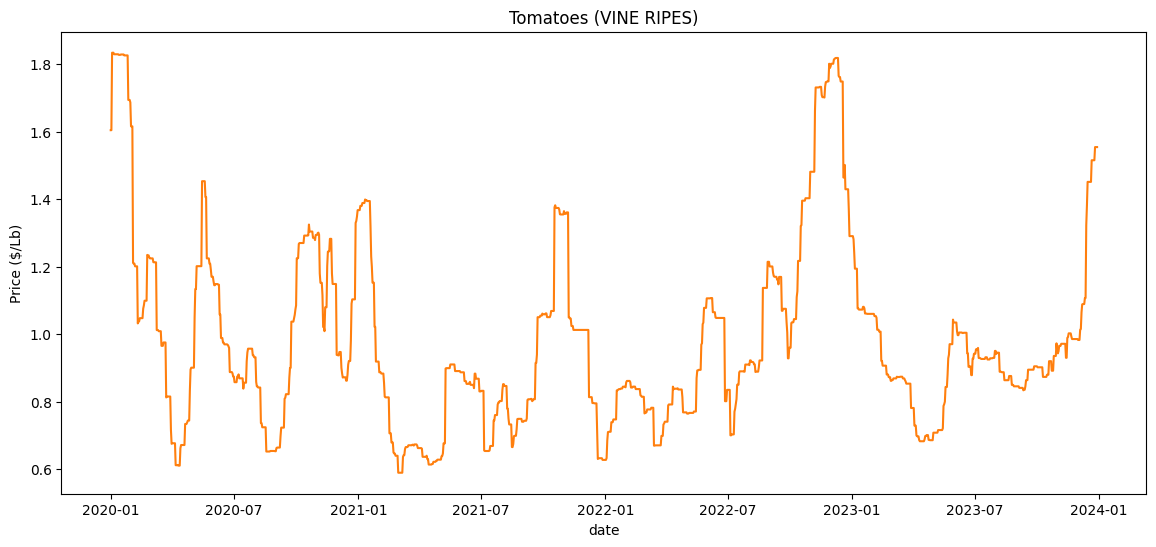

In [132]:
fig,ax = plt.subplots(1,1,figsize=(14,6))
plotdf = onevarietydf_filled[onevarietydf_filled.index.year.isin(range(2020,2024))]
ax.plot(plotdf.index, plotdf.ppp, color='tab:orange')
ax.set_xlabel('date')
ax.set_ylabel('Price ($/Lb)')

plt.title(commodity + " ("+variety+")")
plt.show()

In [137]:
cause_effect_df = onevarietydf_filled.resample('MS').mean()

In [138]:
area_name = "tomato_states"
input_filepath = "C:/Users/sarav/OneDrive - Fordham University/Planette/Code/data/"+area_name+"/"+"hindcasts_pr_"+area_name+".csv"
# Get the raw precip data
rawdf = pd.read_csv(input_filepath)
rawdf['date'] = pd.to_datetime(rawdf['Date'])
rawdf.set_index('date', inplace=True)
rawdf.head()

,Location,Date,True Value,Hindcast Predictions,Confidence Lower,Confidence Upper,Trend,Seasonal Cycle
date,,,,,,,,
2007-03-01,tomato_states,2007-03-01,-0.000004,0.000006,-0.000061,0.000073,0.002619,0.000224
2007-04-01,tomato_states,2007-04-01,0.000048,0.000034,-0.000023,0.000091,0.002619,0.000271
2007-05-01,tomato_states,2007-05-01,0.000082,0.000036,-0.000015,0.000086,0.002619,0.000129
2007-06-01,tomato_states,2007-06-01,0.000018,-0.000030,-0.000084,0.000023,0.002619,-0.000133
2007-07-01,tomato_states,2007-07-01,0.000085,0.000037,-0.000012,0.000086,0.002619,-0.000264


In [139]:
rain = pd.DataFrame(index=rawdf.index)
rain['rain'] = (rawdf['True Value']+rawdf['Seasonal Cycle']+rawdf['Trend'])*30000
pprint(rain[rain.index.year>=2015].head())
cause_effect_df = tomato_prices.copy()
cause_effect_df['rain'] = rain.shift(4)['rain']*-1
pprint(cause_effect_df.head())

                 rain
date                 
2015-01-01  72.518428
2015-02-01  80.416229
2015-03-01  86.048703
2015-04-01  81.823225
2015-05-01  78.675876
                 ppp       rain
2015-01-01  0.959776 -71.064997
2015-02-01  0.903655 -74.998791
2015-03-01  0.877958 -83.845496
2015-04-01  0.873269 -74.651498
2015-05-01  0.748041 -72.518428


In [140]:
input_filepath = "C:/Users/sarav/OneDrive - Fordham University/Planette/Code/data/"+area_name+"/"+"hindcasts_t_2m_"+area_name+".csv"
# Get the raw precip data
rawdf = pd.read_csv(input_filepath)
rawdf['date'] = pd.to_datetime(rawdf['Date'])
rawdf.set_index('date', inplace=True)
rawdf.head()

,Location,Date,True Value,Hindcast Predictions,Confidence Lower,Confidence Upper,Trend,Seasonal Cycle
date,,,,,,,,
2007-03-01,tomato_states,2007-03-01,-0.008746,0.085480,-0.006419,0.177380,289.93540,1.283092
2007-04-01,tomato_states,2007-04-01,0.054943,0.023740,-0.039433,0.086914,289.93744,0.696303
2007-05-01,tomato_states,2007-05-01,-0.188170,0.013187,-0.070873,0.097248,289.93973,-0.092641
2007-06-01,tomato_states,2007-06-01,-0.016210,0.014588,-0.088167,0.117343,289.94193,-1.047664
2007-07-01,tomato_states,2007-07-01,-0.235941,-0.011237,-0.097428,0.074955,289.94424,-1.754573


In [152]:
tempr = pd.DataFrame(index=rawdf.index)
tempr['temperature'] = (rawdf['True Value'])

cause_effect_df['temperature'] = tempr.shift(2)['temperature']
pprint(cause_effect_df.head())

                 ppp       rain  temperature
2015-01-01  0.959776 -71.064997    -0.153251
2015-02-01  0.903655 -74.998791    -0.190078
2015-03-01  0.877958 -83.845496    -0.318097
2015-04-01  0.873269 -74.651498    -0.099821
2015-05-01  0.748041 -72.518428    -0.237811


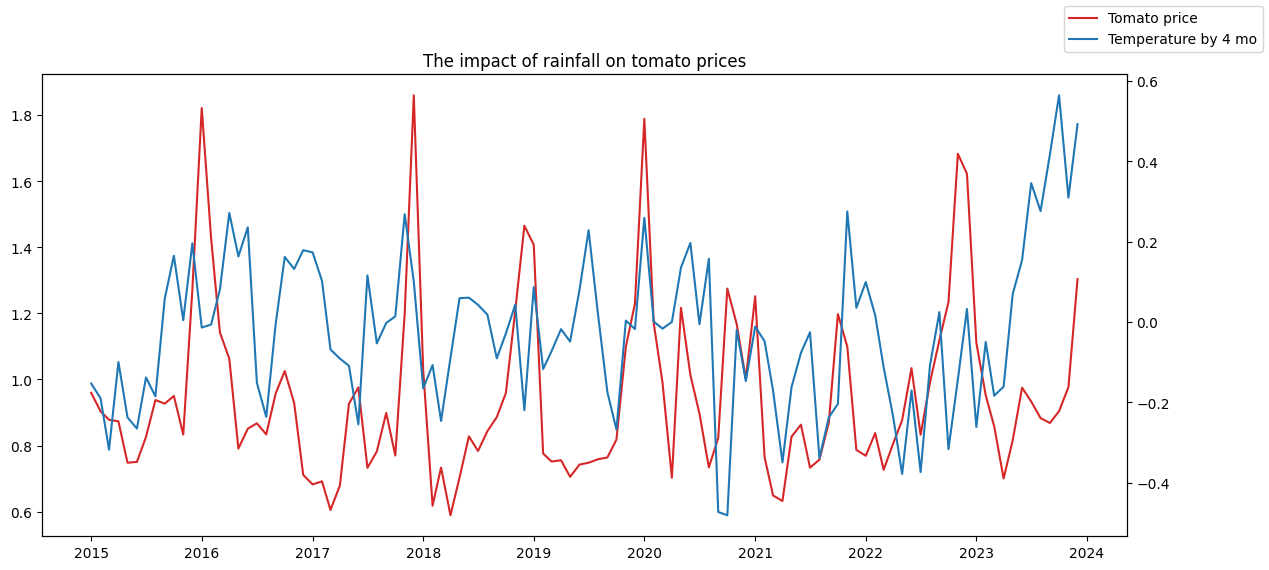

In [153]:
# Visualize the cause and effect relationship between rain anomalies and tomato prices
fig, ax1 = plt.subplots(1,1,figsize=(14,6))
ax1.plot(cause_effect_df.index, cause_effect_df.ppp, color="tab:red", label="Tomato price")
ax2 = ax1.twinx()
ax2.plot(cause_effect_df.index, cause_effect_df.temperature, color="tab:blue", label="Temperature by 4 mo")

fig.legend()

plt.title('The impact of rainfall on tomato prices')
plt.show()